In [1]:
from generateAirfoil import generateAirfoil
from ada.geometry.airfoils.kulfan import Kulfan
import os
import natsort
import numpy as np

%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 15})
import matplotlib
# colors = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#666666', '#000000']
colors = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#000000']
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colors)

combined = os.listdir('.')
tsh     = natsort.natsorted([f for f in combined if os.path.isfile(f)], alg=natsort.ns.IGNORECASE)
folders = natsort.natsorted([f for f in combined if not os.path.isfile(f) and f[0]!='.' and f[0]!='_'], alg=natsort.ns.IGNORECASE)

# dua = generateAirfoil('du_95-w-180')
# ffa = generateAirfoil('ffa-w1-182')
# ffa = generateAirfoil('ffa-w1-152')


comparisonAirfoils = {
    '15' : [  None         , 'ffa-w2-152', 'riso-a-15', 'riso-b-15', 'riso-p-15', 's832', 's826' ],
    '18' : [ 'du_95-w-180' , 'ffa-w1-182', 'riso-a-18', 'riso-b-17', 'riso-p-18', 's831', 's825' ],
    '21' : [ 'du_00-w-212' , 'ffa-w3-211', 'riso-a-21', 'riso-b-20', 'riso-p-20', 's830',  None  ],
    '24' : [ 'du_91-w2-250', 'ffa-w3-241', 'riso-a-24', 'riso-b-23', 'riso-p-23', 's818', 's814' ],
    '27' : [ 'du_91-w2-250', 'ffa-w3-270', 'riso-a-27',  None      ,  None      ,  None , 's815' ],
    '30' : [ 'du_97-w-300' , 'ffa-w3-301', 'riso-a-30',  None      ,  None      ,  None ,  None  ],
    '33' : [ 'du_00-w2-350', 'ffa-w3-332',  None      ,  None      ,  None      ,  None ,  None  ],
    '36' : [ 'du_00-w2-350', 'ffa-w3-360',  None      , 'riso-b-35',  None      ,  None ,  None  ],
}

bestCandidates = {
    '15' : [ ],
    '18' : [ ],
    '21' : [ ],
    '24' : [ ],
    '27' : [ ],
    '30' : [ ],
    '33' : [ ],
    '36' : [ ],
}

Nk = 4

for folder in folders:
    if folder != 'archived_runs':
        print(folder)
        comp_afls = comparisonAirfoils[folder[-2:]]
        files = natsort.natsorted([ f for f in os.listdir(folder) if '.txt' in f], alg=natsort.ns.IGNORECASE)
        for gen in range(0,len(files)):
            # fig = plt.figure(figsize = (12,8))
            fig,ax=plt.subplots(1, figsize = (12,7)) #open a figure
            pop = np.loadtxt(folder + os.sep + files[gen])
            for ind in range(0,len(pop)):
                afl = Kulfan(TE_gap=0)
                afl.upperCoefficients = pop[ind][0:Nk]
                afl.lowerCoefficients = pop[ind][Nk:2*Nk]
                rs = pop[ind][2*Nk:]

                if ind == 0:
                    bestCandidates[folder[-2:]].append(pop[ind])
                    # print(gen)
                    # print(afl.upperCoefficients)
                    # print(afl.lowerCoefficients)
                    # pass
                else: 
                    alpha = 0.01
                    plt.plot(afl.xcoordinates, afl.ycoordinates, color='k', alpha = alpha)

            for iii,ca in enumerate(comp_afls):
                if ca is not None:
                    cafl = generateAirfoil(ca)
                    plt.plot(cafl.xcoordinates, cafl.ycoordinates, color=colors[iii], label = ca, alpha=0.5)

            ind = 0
            afl = Kulfan(TE_gap=0)
            afl.upperCoefficients = pop[ind][0:Nk]
            afl.lowerCoefficients = pop[ind][Nk:2*Nk]
            rs = pop[ind][2*Nk:]
            plt.plot(afl.xcoordinates, afl.ycoordinates, color='k', label = 'Best Candidate')

            plt.title('Thickness: 0.%s , Generation: %d'%(folder[-2:],gen))
            plt.ylim([-0.25,0.25])
            # plt.axis('equal')
            ax.set_aspect('equal',adjustable='box')
            plt.tight_layout()
            plt.legend(loc='upper right', fontsize="10")
            plt.savefig(folder + os.sep + 'Generation_%d_airfoils.png'%(gen), dpi=250)
            plt.close()


# tags = [
#     "obj",
#     "con_tag",
#     "alpha_design",
#     "LoD_clean_at_design_cl",
#     "stall_margin_clean",
#     "stall_margin_rough",
#     "lift_margin_clean",
#     "delta_cl_clean_to_rough_at_alpha_design",
#     "delta_LoD_clean_to_rough_at_alpha_design",
#     "LoD_clean_15percent_left",
#     "LoD_clean_15percent_right",
#     "tau",
#     "leading_edge_radius_upper", 
#     "leading_edge_radius_lower",
#     "Ixx",
#     "Iyy",
#     "Izz",
#     "A",
#     "con_stall_clean",
#     "con_stall_rough",
#     "con_ixx",
#     "con_iyy",
#     "con_izz",
#     "con_a",
#     "con_tau",
# ]

# opt = dict(zip(tags,rs))
# # print(p[0:N_k])
# for ky,vl in opt.items():
#     print(ky.rjust(45), ' : ', vl)
# print()

# plt.plot(dua.xcoordinates, dua.ycoordinates)
# plt.plot(afl.xcoordinates, afl.ycoordinates)
# plt.axis('equal');


03_Aug_2024_23-13__tau_15


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]


03_Aug_2024_23-14__tau_24


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


03_Aug_2024_23-15__tau_18


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


03_Aug_2024_23-15__tau_21


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]


03_Aug_2024_23-17__tau_27


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1

03_Aug_2024_23-21__tau_33


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


03_Aug_2024_23-22__tau_30


/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1606: RuntimeWarning: invalid value encountered in multiply
  zetau_temp[i,:] = C*Su_temp[i,:]+psi*(self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1605: RuntimeWarning: invalid value encountered in multiply
  Su_temp[i,:] = self.upperCoefficients[i].to('').magnitude*S[i,:]
/Users/cjkarch/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1630: RuntimeWarning: invalid value encountered in multiply
  zetal_temp[i,:] = C*Sl_temp[i,:]+psi*(-self.constants.TE_gap/2.)
/Users/cjkarch/software/ada/ada/geometry/airfoils/kulfan.py:1629: RuntimeWarning: invalid value encountered in multiply
  Sl_temp[i,:] = self.lowerCoefficients[i].to('').magnitude*S[i,:]


03_Aug_2024_23-33__tau_36


03_Aug_2024_23-13__tau_15


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-14__tau_24


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-15__tau_18
s831: xfoil did not converge
riso-a-18: xfoil did not converge


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-15__tau_21
du_00-w-212: xfoil did not converge


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-17__tau_27


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-21__tau_33


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-22__tau_30


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


03_Aug_2024_23-33__tau_36


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG
Note: The following floating-point excep

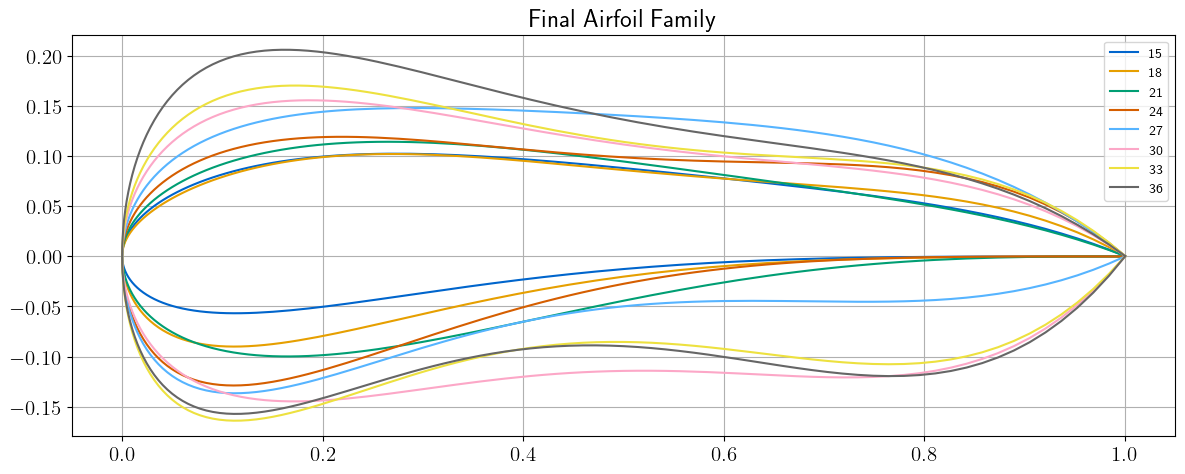

In [2]:
import json
from ada.analysis.apis.xfoil.run import run as run_xfoil
# colors = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#000000']

# comparisonAirfoils = {
#     '15' : [  None         , 'ffa-w2-152', 'riso-a-15', 'riso-b-15', 'riso-p-15', 's832', 's826' ],
#     '18' : [ 'du_95-w-180' , 'ffa-w1-182', 'riso-a-18', 'riso-b-17', 'riso-p-18', 's831', 's825' ],
#     '21' : [ 'du_00-w-212' , 'ffa-w3-211', 'riso-a-21', 'riso-b-20', 'riso-p-20', 's830',  None  ],
#     '24' : [ 'du_91-w2-250', 'ffa-w3-241', 'riso-a-24', 'riso-b-23', 'riso-p-23', 's818', 's814' ],
#     '27' : [ 'du_91-w2-250', 'ffa-w3-270', 'riso-a-27',  None      ,  None      ,  None , 's815' ],
#     '30' : [ 'du_97-w-300' , 'ffa-w3-301', 'riso-a-30',  None      ,  None      ,  None ,  None  ],
#     '33' : [ 'du_00-w2-350', 'ffa-w3-332',  None      ,  None      ,  None      ,  None ,  None  ],
#     '36' : [ 'du_00-w2-350', 'ffa-w3-360',  None      , 'riso-b-35',  None      ,  None ,  None  ],
# }

def run_xfoil_cl(cl_design, K_upper, K_lower, Re, N_crit, xtr_u, xtr_l, nm):
    res_fastrun = []
    for alpha in [0,5,10,15,20,25]:
        res_q = run_xfoil('alfa', K_upper, K_lower, alpha, Re=Re, N_crit=N_crit, xtr_u=xtr_u, xtr_l=xtr_l)
        if res_q is not None:
            res_fastrun.append(res_q)
            
    cl_quick = [rs['cl'] for rs in res_fastrun]
    alpha_quick = [rs['alpha'] for rs in res_fastrun]

    clean_results = []
    if cl_design < max(cl_quick):
        slice_idx = [ i for i,vl in enumerate(cl_quick) if vl>cl_design ][0]
        if cl_quick[slice_idx] == cl_quick[slice_idx-1]:
            dist = 0.5
            alpha_design_guess = alpha_quick[slice_idx-1] + (alpha_quick[slice_idx] - alpha_quick[slice_idx-1])*dist
        else:
            dist = ( cl_design - cl_quick[slice_idx-1] )/( cl_quick[slice_idx] - cl_quick[slice_idx-1] )
            alpha_design_guess = alpha_quick[slice_idx-1] + (alpha_quick[slice_idx] - alpha_quick[slice_idx-1])*dist
        res_aguess = run_xfoil('alfa', K_upper, K_lower, round(alpha_design_guess,3), Re=Re, N_crit=N_crit, xtr_u=xtr_u, xtr_l=xtr_l)
        if res_aguess is None:
            res_aguess = run_xfoil('alfa', K_upper, K_lower, round(alpha_design_guess,0), Re=Re, N_crit=N_crit, xtr_u=xtr_u, xtr_l=xtr_l)
            
        if res_aguess is None:
            print(nm + ' failed to find cl, did not converge')
            return None
        else:
            if abs(res_aguess['cl'] - cl_design)/cl_design > 0.05:
                print(nm + ' failed to find cl, error of %f percent'%(abs(res_aguess['cl'] - cl_design)/cl_design*100))
            return res_aguess
        # else:
            # raise ValueError('Could not find CL')
    else:
        print(nm + ' failed to find cl, could not reach CL target')
        return None    

design_matrix = [
    # tau,  CL,  spn,     Re
    [0.15, 1.5, 1.00, 10.0e6, ],
    [0.18, 1.5, 1.00, 10.0e6, ],
    [0.21, 1.5, 1.00, 12.0e6, ],
    [0.24, 1.4, 0.85, 13.0e6, ],
    [0.27, 1.3, 0.55, 16.0e6, ],
    [0.30, 1.2, 0.50, 18.0e6, ],
    [0.33, 1.2, 0.35, 16.0e6, ],
    [0.36, 1.2, 0.20, 13.0e6, ],
]

Nk = 4

finalFamily = {
    '15' : None, 
    '18' : None, 
    '21' : None, 
    '24' : None, 
    '27' : None, 
    '30' : None, 
    '33' : None, 
    '36' : None, 
}

for folder in folders:
    if folder != 'archived_runs':
        print(folder)
        tau = folder[-2:]
        # if tau == '18':
        CL = design_matrix[ [ dm[0] for dm in design_matrix ].index(int(tau)/100)][1]
        Re = design_matrix[ [ dm[0] for dm in design_matrix ].index(int(tau)/100)][3]
        comp_afls = comparisonAirfoils[tau]
        bcs = bestCandidates[tau]
        finalFamily[tau]=bcs[-1]

        # plot evolution of objective function
        plt.figure(figsize=(12,8))
        plt.plot([b[2*Nk] for b in bcs])
        plt.title('Tau : %s'%(tau))
        plt.ylabel('Objective Function')
        plt.xlabel('Generation')
        plt.ylim([8,15])
        plt.xlim([0,350])
        plt.grid(1)
        plt.tight_layout()
        plt.savefig(folder + os.sep + 'Objective_Evolution.png', dpi=250)
        plt.close()

        # plot evolution of design variables
        plt.figure(figsize=(12,8))
        for i in range(0,2*Nk):
            last_v = bcs[-1][i]
            # print(last_v)
            if i <= Nk-1:
                plt.plot([b[i] for b in bcs], color = colors[0], alpha = 0.5)
            else:
                plt.plot([b[i] for b in bcs], color = colors[1], alpha = 0.5)
        plt.title('Tau : %s'%(tau))
        plt.ylabel('Variable Value')
        plt.xlabel('Generation')
        # plt.ylim([0,5])
        plt.xlim([0,350])
        plt.grid(1)
        plt.tight_layout()
        plt.savefig(folder + os.sep + 'Variable_Evolution.png', dpi=250)
        plt.close()

        # plot cp comparisons to reference airfoils @ design CL, Clean
        plt.figure(figsize=(12,8))
        for iii,ca in enumerate(comp_afls):
            if ca is not None:
                cafl = generateAirfoil(ca)
                if os.path.isfile('cp_clean_%s.json'%(ca)):
                    with open('cp_clean_%s.json'%(ca), 'r') as f:
                        rs = json.load(f)
                else:
                    rs = run_xfoil_cl(CL, cafl.upperCoefficients, cafl.lowerCoefficients, Re, N_crit=9.0, xtr_u=1.0, xtr_l=1.0, nm=ca)
                    with open('cp_clean_%s.json'%(ca), 'w') as f:
                        json.dump(rs, f)
                if rs is not None:
                    plt.plot(rs['cp_data']['x'], rs['cp_data']['cp'], color=colors[iii], label = ca, alpha=0.5)
                else:
                    print(ca + ': xfoil did not converge')   
        
        rs = run_xfoil('alfa', bcs[-1][0:Nk], bcs[-1][Nk:2*Nk], bcs[-1][2*Nk+2],  Re, N_crit=9.0, xtr_u=1.0, xtr_l=1.0)
        if rs is None:
            rs = run_xfoil('alfa', bcs[-1][0:Nk], bcs[-1][Nk:2*Nk], round(bcs[-1][2*Nk+2],2),  Re, N_crit=9.0, xtr_u=1.0, xtr_l=1.0)    
        if rs is not None:
            plt.plot(rs['cp_data']['x'], rs['cp_data']['cp'], color='k', label = 'Custom Airfoil')
            
        plt.title('Tau : %s , Clean'%(tau))
        plt.ylabel('Cp')
        plt.xlabel('x')
        # plt.ylim([0,5])
        plt.xlim([-0.02,1.02])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper right')#, fontsize='10')
        plt.gca().invert_yaxis()
        plt.savefig(folder + os.sep + 'CP_comparison_clean.png', dpi=250)
        plt.close()
        
        # plot cp comparisons to reference airfoils @ design CL, Rough
        plt.figure(figsize=(12,8))
        for iii,ca in enumerate(comp_afls):
            if ca is not None:
                cafl = generateAirfoil(ca)
                if os.path.isfile('cp_rough_%s.json'%(ca)):
                    with open('cp_rough_%s.json'%(ca), 'r') as f:
                        rs = json.load(f)
                else:
                    rs = run_xfoil_cl(CL, cafl.upperCoefficients, cafl.lowerCoefficients, Re, N_crit=3.0, xtr_u=0.05, xtr_l=0.05, nm=ca)
                    with open('cp_rough_%s.json'%(ca), 'w') as f:
                        json.dump(rs, f)
                if rs is not None:
                    plt.plot(rs['cp_data']['x'], rs['cp_data']['cp'], color=colors[iii], label = ca, alpha=0.5)
                else:
                    print(ca + ': xfoil did not converge')
        
        rs = run_xfoil('alfa', bcs[-1][0:Nk], bcs[-1][Nk:2*Nk], bcs[-1][2*Nk+2],  Re, N_crit=3.0, xtr_u=0.05, xtr_l=0.05)    
        if rs is None:
            rs = run_xfoil('alfa', bcs[-1][0:Nk], bcs[-1][Nk:2*Nk], round(bcs[-1][2*Nk+2],2),  Re, N_crit=3.0, xtr_u=0.05, xtr_l=0.05) 
        if rs is not None:
            plt.plot(rs['cp_data']['x'], rs['cp_data']['cp'], color='k', label = 'Custom Airfoil')
            
        plt.title('Tau : %s , Rough'%(tau))
        plt.ylabel('Cp')
        plt.xlabel('x')
        # plt.ylim([0,5])
        plt.xlim([-0.02,1.02])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper right')#, fontsize='10')
        plt.gca().invert_yaxis()
        plt.savefig(folder + os.sep + 'CP_comparison_rough.png', dpi=250)
        plt.close()

        # Sweep AoA clean
        if os.path.isfile('dta_clean_t%s.json'%(tau)):
            with open('dta_clean_t%s.json'%(tau), 'r') as f:
                dta_clean = json.load(f)
        else:
            dta_clean = {}
            for iii,ca in enumerate(comp_afls):
                if ca is not None:
                    dta_clean[ca] = []
                    cafl = generateAirfoil(ca)
                    for alpha in np.linspace(-30,30,31):
                        res = run_xfoil('alfa', cafl.upperCoefficients, cafl.lowerCoefficients, alpha, Re, N_crit=9.0, xtr_u=1.0, xtr_l=1.0)
                        if res is not None:
                            dta_clean[ca].append(res)
                else:
                    dta_clean[iii]=None
            with open('dta_clean_t%s.json'%(tau), 'w') as f:
                json.dump(dta_clean, f)
                
        dta_clean['Custom Airfoil'] = []
        for alpha in np.linspace(-30,30,31):
            res = run_xfoil('alfa', bcs[-1][0:Nk], bcs[-1][Nk:2*Nk], alpha,  Re, N_crit=9.0, xtr_u=1.0, xtr_l=1.0)    
            if res is not None:
                dta_clean['Custom Airfoil'].append(res) 
        

        # Sweep AoA rough
        if os.path.isfile('dta_rough_t%s.json'%(tau)):
            with open('dta_rough_t%s.json'%(tau), 'r') as f:
                dta_rough = json.load(f)
        else:
            dta_rough = {}
            for iii,ca in enumerate(comp_afls):
                if ca is not None:
                    dta_rough[ca] = []
                    cafl = generateAirfoil(ca)
                    for alpha in np.linspace(-30,30,31):
                        res = run_xfoil('alfa', cafl.upperCoefficients, cafl.lowerCoefficients, alpha, Re, N_crit=3.0, xtr_u=0.05, xtr_l=0.05)
                        if res is not None:
                            dta_rough[ca].append(res)
                else:
                     dta_rough[iii] = None
            with open('dta_rough_t%s.json'%(tau), 'w') as f:
                json.dump(dta_rough, f)
                
        dta_rough['Custom Airfoil'] = []
        for alpha in np.linspace(-30,30,31):
            res = run_xfoil('alfa', bcs[-1][0:Nk], bcs[-1][Nk:2*Nk], alpha,  Re, N_crit=3.0, xtr_u=0.05, xtr_l=0.05)    
            if res is not None:
                dta_rough['Custom Airfoil'].append(res) 
                    
        # Plot CL vs. Alpha Curves
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_clean.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['alpha'] for v in val], [v['cl'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Clean'%(tau))
        plt.ylabel('CL')
        plt.xlabel('Alpha')
        plt.xlim([-31,31])
        plt.ylim([-3,3])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.savefig(folder + os.sep + 'CL_v_Alpha_clean.png', dpi=250)
        plt.close()
        
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_rough.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['alpha'] for v in val], [v['cl'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Rough'%(tau))
        plt.ylabel('CL')
        plt.xlabel('Alpha')
        plt.xlim([-31,31])
        plt.ylim([-3,3])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.savefig(folder + os.sep + 'CL_v_Alpha_rough.png', dpi=250)
        plt.close()

        
        # Plot CL vs. CD curves
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_clean.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['cd'] for v in val], [v['cl'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Clean'%(tau))
        plt.ylabel('CL')
        plt.xlabel('CD')
        plt.xlim([0,0.03])
        plt.ylim([-3,3])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper right', framealpha=1)
        plt.savefig(folder + os.sep + 'CL_v_CD_clean.png', dpi=250)
        plt.close()
        
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_rough.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['cd'] for v in val], [v['cl'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Rough'%(tau))
        plt.ylabel('CL')
        plt.xlabel('CD')
        plt.xlim([0,0.03])
        plt.ylim([-3,3])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper right', framealpha=1)
        plt.savefig(folder + os.sep + 'CL_v_CD_rough.png', dpi=250)
        plt.close()


        # Plot L/D vs Alpha curves
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_clean.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['alpha'] for v in val], [v['cl']/v['cd'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Clean'%(tau))
        plt.ylabel('L/D')
        plt.xlabel('Alpha')
        plt.xlim([-31,31])
        plt.ylim([-300,300])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.savefig(folder + os.sep + 'LD_v_Alpha_clean.png', dpi=250)
        plt.close()
        
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_rough.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['alpha'] for v in val], [v['cl']/v['cd'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Rough'%(tau))
        plt.ylabel('L/D')
        plt.xlabel('Alpha')
        plt.xlim([-31,31])
        plt.ylim([-300,300])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.savefig(folder + os.sep + 'LD_v_Alpha_rough.png', dpi=250)
        plt.close()


        # Plot L/D vs CL curves
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_clean.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['cl'] for v in val], [v['cl']/v['cd'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Clean'%(tau))
        plt.ylabel('L/D')
        plt.xlabel('CL')
        plt.xlim([-3,3])
        plt.ylim([-300,300])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.savefig(folder + os.sep + 'LD_v_CL_clean.png', dpi=250)
        plt.close()
        
        plt.figure(figsize=(12,8))
        iii = 0
        for ky, val in dta_rough.items():
            if ky == 'Custom Airfoil':
                alpha_plot = 1.0
            else:
                alpha_plot = 0.5
            if val is not None:
                plt.plot([v['cl'] for v in val], [v['cl']/v['cd'] for v in val], color = colors[iii], alpha = alpha_plot, label=ky)
            iii += 1
        plt.title('Tau : %s , Rough'%(tau))
        plt.ylabel('L/D')
        plt.xlabel('CL')
        plt.xlim([-3,3])
        plt.ylim([-300,300])
        plt.grid(1)
        plt.tight_layout()
        plt.legend(loc='upper left')
        plt.savefig(folder + os.sep + 'LD_v_CL_rough.png', dpi=250)
        plt.close()
        
        
plt.figure(figsize=(12,5))
iii = 0
colors2 = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#666666', '#000000']
for ky, val in finalFamily.items():
    afl = Kulfan()
    afl.upperCoefficients = val[0:Nk]
    afl.lowerCoefficients = val[Nk:2*Nk]
    plt.plot(afl.xcoordinates, afl.ycoordinates, color = colors2[iii], label=ky)
    iii += 1
plt.title('Final Airfoil Family')
# plt.ylabel('L/D')
# plt.xlabel('CL')
# plt.xlim([-3,3])
# plt.ylim([-300,300])
plt.grid(1)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='upper right', fontsize='10');
# plt.savefig(folder + os.sep + 'LD_v_CL_rough.png', dpi=250)
# plt.close()

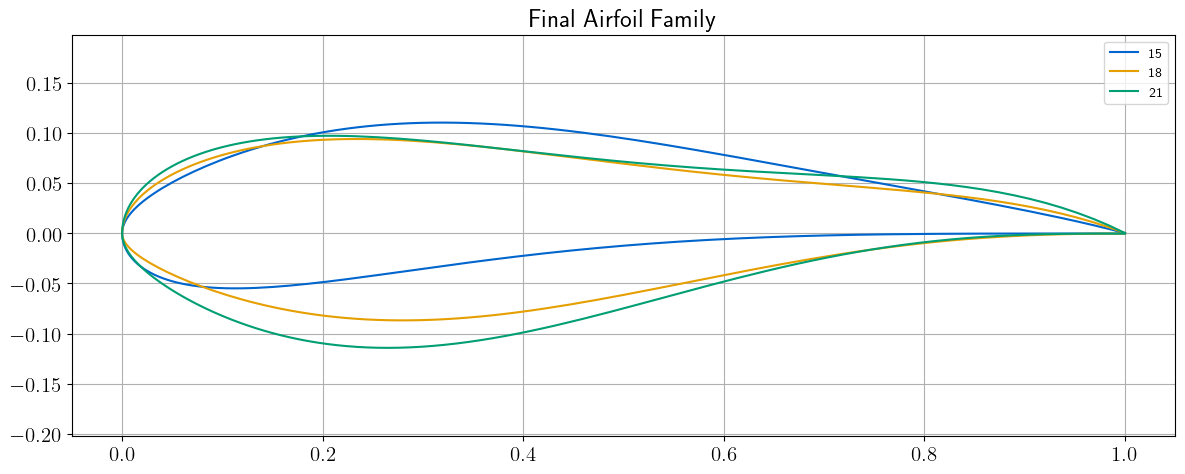

In [4]:
plt.figure(figsize=(12,5))
iii = 0
colors2 = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#666666', '#000000']
for ky, val in finalFamily.items():
    if ky in ['15','18','21']:
        afl = Kulfan()
        afl.upperCoefficients = val[0:Nk]
        afl.lowerCoefficients = val[Nk:2*Nk]
        plt.plot(afl.xcoordinates, afl.ycoordinates, color = colors2[iii], label=ky)
    iii += 1
plt.title('Final Airfoil Family')
# plt.ylabel('L/D')
# plt.xlabel('CL')
# plt.xlim([-3,3])
# plt.ylim([-300,300])
plt.grid(1)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='upper right', fontsize='10');
# plt.savefig(folder + os.sep + 'LD_v_CL_rough.png', dpi=250)
# plt.close()